In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
winedata = np.loadtxt("wine.data", delimiter=",")
y = winedata[:, 0]
y = y.astype(np.int64)
x = winedata[:, 1:]

In [7]:
wine = pd.read_csv("wine.data")

In [8]:
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [9]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7]},
             scoring='accuracy')

Dataset shape: (178, 13)

First 5 rows of the dataset:
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

Checking for missing values:
Missing values: 0

Summarizing statistics:
Mean: [1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.4689

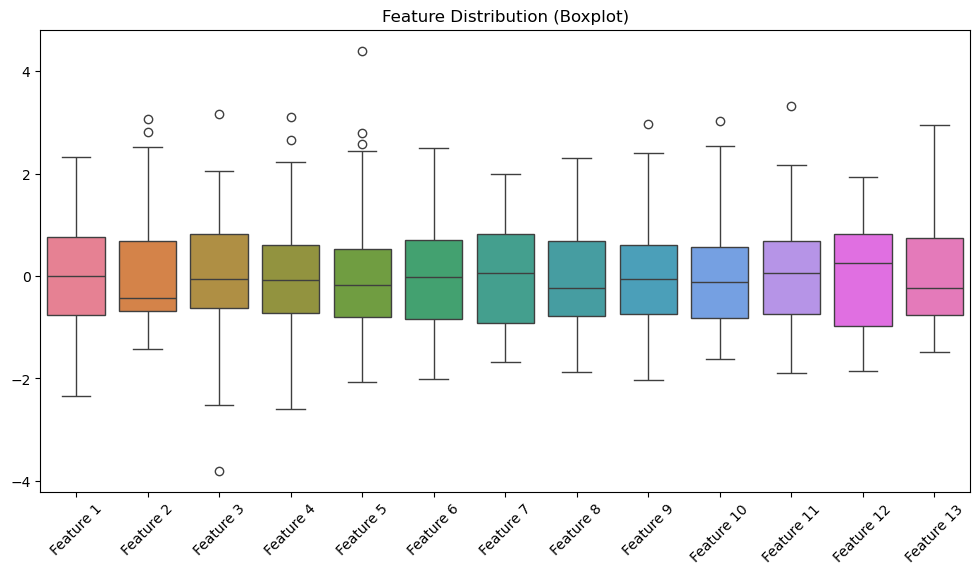

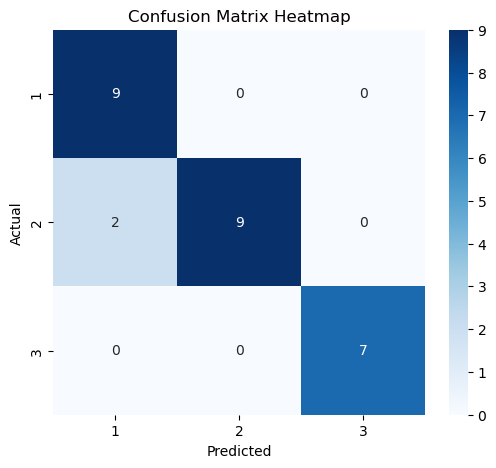

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Load the dataset
winedata = np.loadtxt("wine.data", delimiter=",")
y = winedata[:, 0]
y = y.astype(np.int64)
x = winedata[:, 1:]

#Explore the Data
print("Dataset shape:", x.shape)
print("\nFirst 5 rows of the dataset:")
print(x[:5])

print("\nChecking for missing values:")
print("Missing values:", (x == None).sum())

print("\nSummarizing statistics:")
print("Mean:", x.mean(axis=0))
print("Standard Deviation:", x.std(axis=0))

print("\nClass distribution:")
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
print("\n_\n")

#Split the Data
x_train, x_testval, y_train, y_testval = train_test_split(x, y, test_size=0.3, random_state=17, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_testval, y_testval, test_size=0.5, random_state=17, stratify=y_testval)

#Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Define hyperparameter grid
param_grid = {
    "n_neighbors": [3, 5, 7],  # Different k values
    "metric": ["euclidean", "manhattan"]  # Different distance metrics
}

# Create k-NN model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_k = grid_search.best_params_["n_neighbors"]
best_metric = grid_search.best_params_["metric"]
best_model = grid_search.best_estimator_

print(f"Best k: {best_k}, Best Distance Metric: {best_metric}")
print(f"Best Validation Accuracy: {grid_search.best_score_:.2f}")

# Train final model
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_knn.fit(x_train, y_train)

# Make Predictions
y_pred = final_knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nFirst 10 predicted vs actual classes:")
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual}, Predicted: {predicted}')

# Get final predictions
y_test_pred = final_knn.predict(x_test)

# Compute classification report (Accuracy, Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

# Compute ROC-AUC (One-vs-One for multi-class classification)
roc_auc = roc_auc_score(y_test, final_knn.predict_proba(x_test), multi_class="ovo")
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
loo_scores = cross_val_score(final_knn, x_train, y_train, cv=loo, scoring="accuracy")
print(f"\nLeave-One-Out Cross-Validation Accuracy: {loo_scores.mean():.4f}")

# Plot some of the results
df = pd.DataFrame(x_train, columns=[f"Feature {i+1}" for i in range(x_train.shape[1])])
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Feature Distribution (Boxplot)")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
print('hello world')